# Import necessary libraries for data analysis and visualization


In [78]:

import pandas as pd  # For data manipulation and analysis (working with tables/dataframes)
import matplotlib.pyplot as plt  # For creating static, interactive visualizations
import seaborn as sns  # For making statistical graphics more attractive and informative
import numpy as np  # For numerical computations and working with arrays

# Set Seaborn style for all plots to make them look nicer
# "whitegrid" provides a white background with grid lines for better readability
sns.set_style("whitegrid")

In [79]:
# Load four different COVID-19 datasets from CSV files
df_vacc = pd.read_csv('country_vaccinations.csv')       
df_world = pd.read_csv('worldometer_data.csv')           
df_full = pd.read_csv('full_grouped.csv')               
df_country = pd.read_csv('country_wise_latest.csv')      

# Convert date column to proper datetime format for vaccination data
# 'dd-mm-yyyy' format specified to avoid confusion with US date format
# errors='coerce' converts invalid dates to NaT (Not a Time) instead of crashing
df_vacc['date'] = pd.to_datetime(df_vacc['date'], format='%d-%m-%Y', errors='coerce')

# Replace all missing values with 0 in vaccination data
# inplace=True modifies the original DataFrame instead of creating a copy
df_vacc.fillna(0, inplace=True)

# Replace missing values with 0 in worldometer data
df_world.fillna(0, inplace=True)

# Convert date column to datetime for full grouped data
df_full['Date'] = pd.to_datetime(df_full['Date'], format='%d-%m-%Y', errors='coerce')

# Replace missing values with 0 in full grouped data
df_full.fillna(0, inplace=True)

# Replace missing values with 0 in country-wise latest data
df_country.fillna(0, inplace=True)

# Aggregate total vaccinations by country and take the top 10

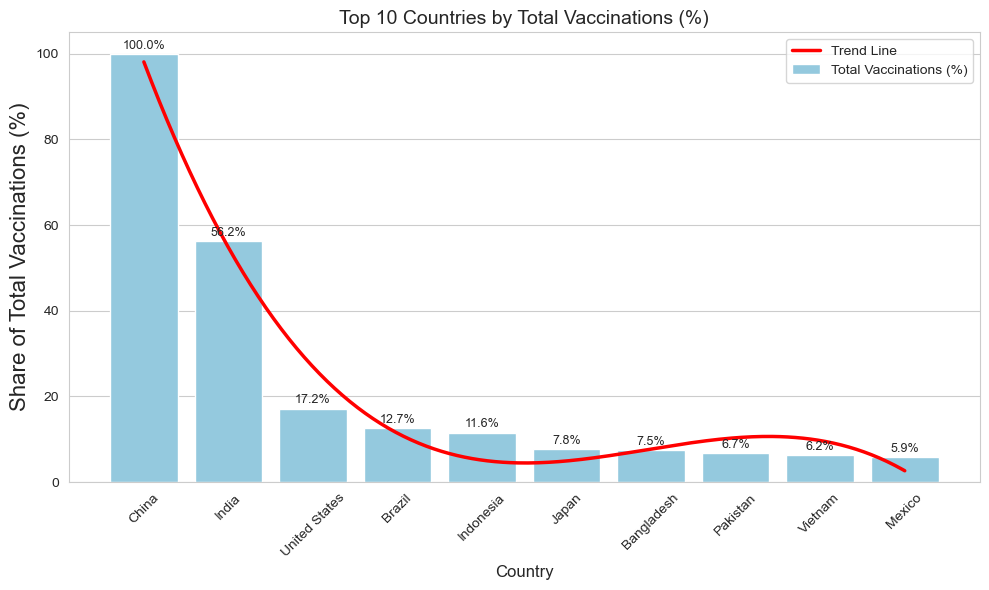

In [ ]:

# Group by country, find maximum vaccinations for each, sort high to low, take top 10
vacc_by_country = (
    df_vacc.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).head(10)
)

# This shows each country's share of the total vaccinations among top 10
vacc_percent = (vacc_by_country / vacc_by_country.sum()) * 100

# Set up the figure with specified size
plt.figure(figsize=(10,6))

# Apply clean white background with grid lines
sns.set_style("whitegrid")

# Create bar chart 
# x=country names, y=percentage values
sns.barplot(x=vacc_percent.index, y=vacc_percent.values, color='skyblue', label='Total Vaccinations (%)')

# Create smooth trend line to show the progression pattern
x = np.arange(len(vacc_percent))          # Create positions [0,1,2,3,4,5,6,7,8,9]
y = vacc_percent.values                   # Get percentage values
z = np.polyfit(x, y, 3)                   # Fit a smooth curve (3rd degree polynomial)
p = np.poly1d(z)                          # Create function from the fitted curve
x_smooth = np.linspace(x.min(), x.max(), 300)  # Create 300 smooth x-points
y_smooth = p(x_smooth)                    # Calculate smooth y-values

# Plot the red trend line over the bars
plt.plot(x_smooth, y_smooth, color='red', linewidth=2.5, label='Trend Line')

# Add chart labels and title
plt.title('Top 10 Countries by Total Vaccinations (%)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Share of Total Vaccinations (%)', fontsize=12)  # Fixed fontsize
plt.xticks(rotation=45)  # Rotate country names for better readability

# Add percentage values on top of each bar for clarity
for i, val in enumerate(vacc_percent.values):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=9)

# Show legend to identify what red line represents
plt.legend()

# Adjust layout to prevent label cutting
plt.tight_layout()

# Display the final chart
plt.show()


# Visualization 2: Line Chart - Daily Vaccinations Over Time for India (using Matplotlib)

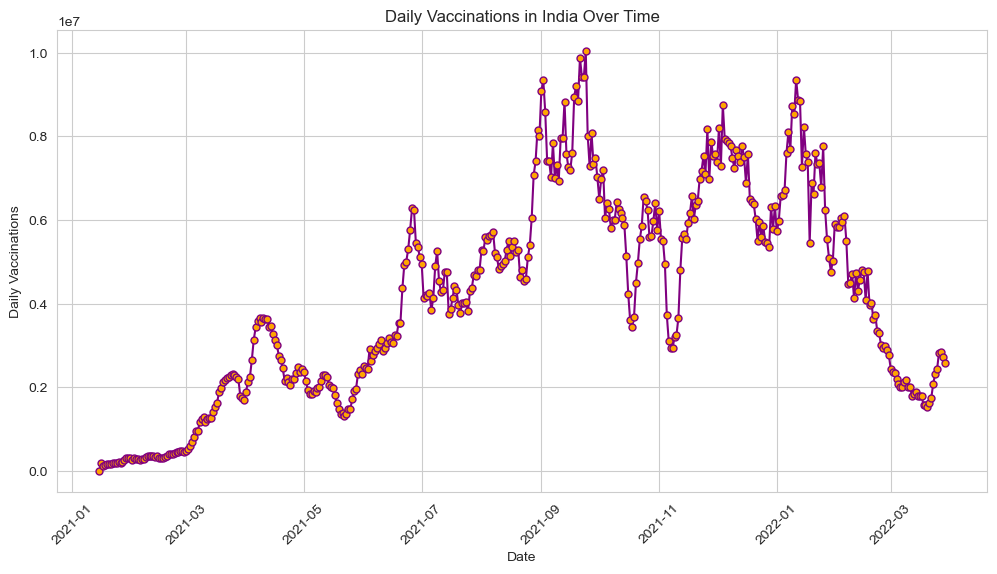

In [ ]:
# Filter the vaccination dataset to get only India's data
# .sort_values('date') sorts the data by date in chronological order (oldest to newest)
ing_data = df_vacc[df_vacc['country'] == 'India'].sort_values('date')

# Create a new figure (plotting area) with specified dimensions
# figsize=(12,6) means the plot will be 12 inches wide and 6 inches tall
plt.figure(figsize=(12,6))

# Create a line plot with customized markers
# plt.plot() creates a line chart connecting data points
plt.plot(ing_data['date'], ing_data['daily_vaccinations'],  # x-axis: dates, y-axis: daily vaccination numbers
         marker='o',                    # Add circle markers at each data point (each day)
         color='purple',                # Set the main line color to purple
         markerfacecolor='orange',      # Set the inside fill color of markers to orange
         markeredgecolor='purple',      # Set the border color of markers to purple
         markersize=5)                  # Set the size of the circle markers to 5

# Add a title to the chart to describe what it shows
plt.title('Daily Vaccinations in India Over Time')

# Label the x-axis (horizontal axis) as 'Date'
plt.xlabel('Date')

# Label the y-axis (vertical axis) as 'Daily Vaccinations'
plt.ylabel('Daily Vaccinations')

# Rotate the x-axis labels (dates) by 45 degrees for better readability
plt.xticks(rotation=45)

# Add grid lines to the chart background
# Grid lines make it easier to read exact values from the chart
plt.grid(True)

# Display the final chart
plt.show()

# Visulation 3: Calculate total COVID cases for each continent

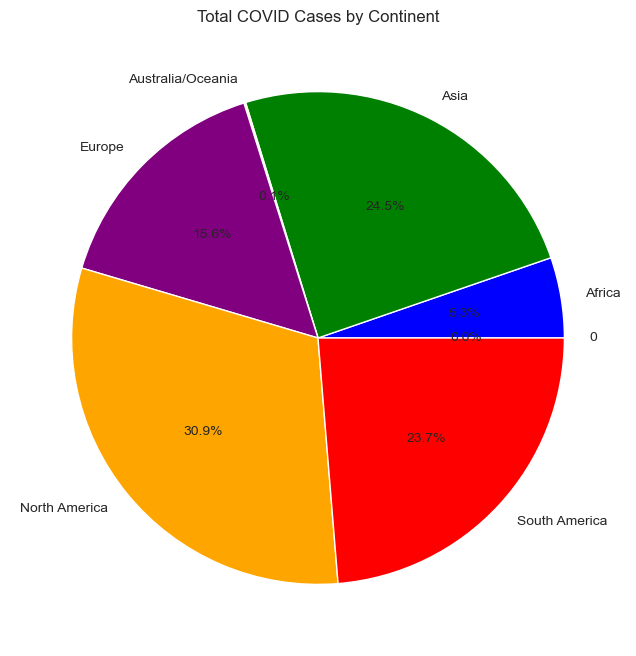

In [82]:

# This gives us the total number of COVID cases in each continent
cases_by_continent = df_world.groupby('Continent')['TotalCases'].sum()

# Create a circular plotting area for the pie chart
# figsize=(8,8) makes the pie chart 8 inches wide and 8 inches tall (perfect circle)
plt.figure(figsize=(8,8))

# Create the pie chart with the following parameters:
plt.pie(cases_by_continent,                           # The data to plot (case numbers for each continent)
        labels=cases_by_continent.index,              # Labels for each slice (continent names)
        autopct='%1.1f%%',                           # Show percentages on each slice with 1 decimal place
        colors=['red', 'blue', 'green', 'yellow', 'purple', 'orange'])  # Custom colors for each continent

# Add a title to the pie chart to explain what it shows
plt.title('Total COVID Cases by Continent')

# Display the final pie chart
plt.show()

# # Visulation 4: Scatter Plot using Seaborn (with hue for WHO Region)

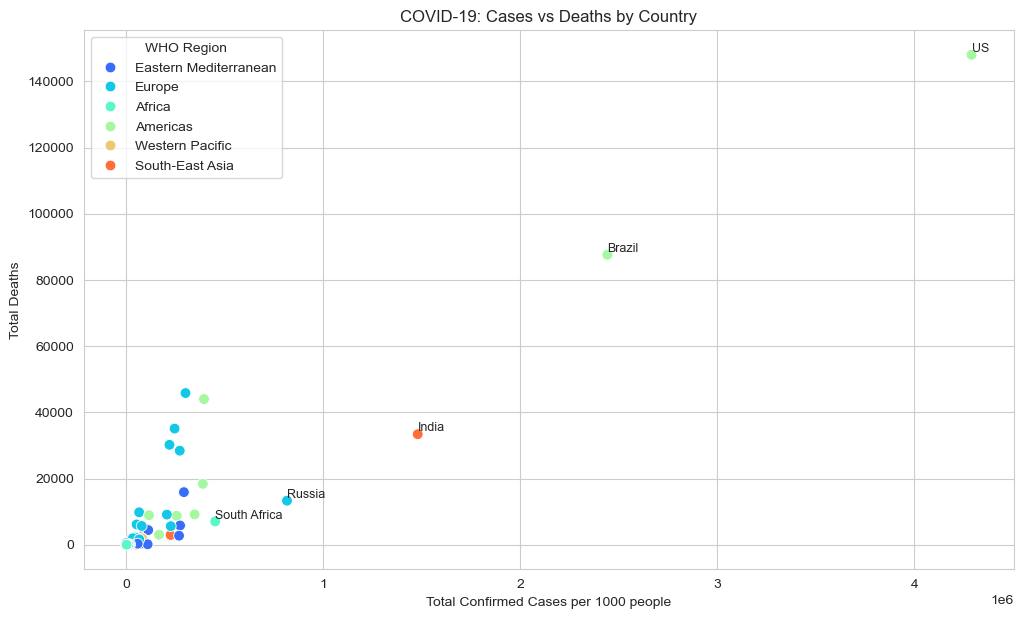

In [ ]:

# figsize=(12,7) means 12 inches wide, 7 inches tall
plt.figure(figsize=(12,7))

# Create a scatter plot to show relationship between cases and deaths
# sns.scatterplot() creates a scatter plot using Seaborn
sns.scatterplot(data=df_country,          # Use the country-wise dataset
                x='Confirmed',            # X-axis: Total confirmed cases
                y='Deaths',               # Y-axis: Total deaths
                hue='WHO Region',         # Color points by WHO Region (Americas, Europe, etc.)
                palette='rainbow',        # Use rainbow colors for different regions
                s=60)                     # Set point size to 60

# nlargest(5, 'Confirmed') finds the 5 countries with highest case numbers
big_countries = df_country.nlargest(5, 'Confirmed')  # Top 5 by cases

# Add country name labels to the top 5 countries on the scatter plot
for i, row in big_countries.iterrows():
    plt.text(row['Confirmed'],           # X-position (cases count)
             row['Deaths'],              # Y-position (deaths count)
             row['Country/Region'],      # Text to display (country name)
             fontsize=9,                 # Text size
             ha='left',                  # Horizontal alignment: left of the point
             va='bottom')                # Vertical alignment: below the point

# Add a descriptive title to the chart
plt.title('COVID-19: Cases vs Deaths by Country')

# Label the x-axis to show what it represents
plt.xlabel('Total Confirmed Cases per 1000 people')

# Label the y-axis to show what it represents
plt.ylabel('Total Deaths')

# Display the final scatter plot
plt.show()

# Heatmap of Correlations (using Seaborn, as it's better for this)

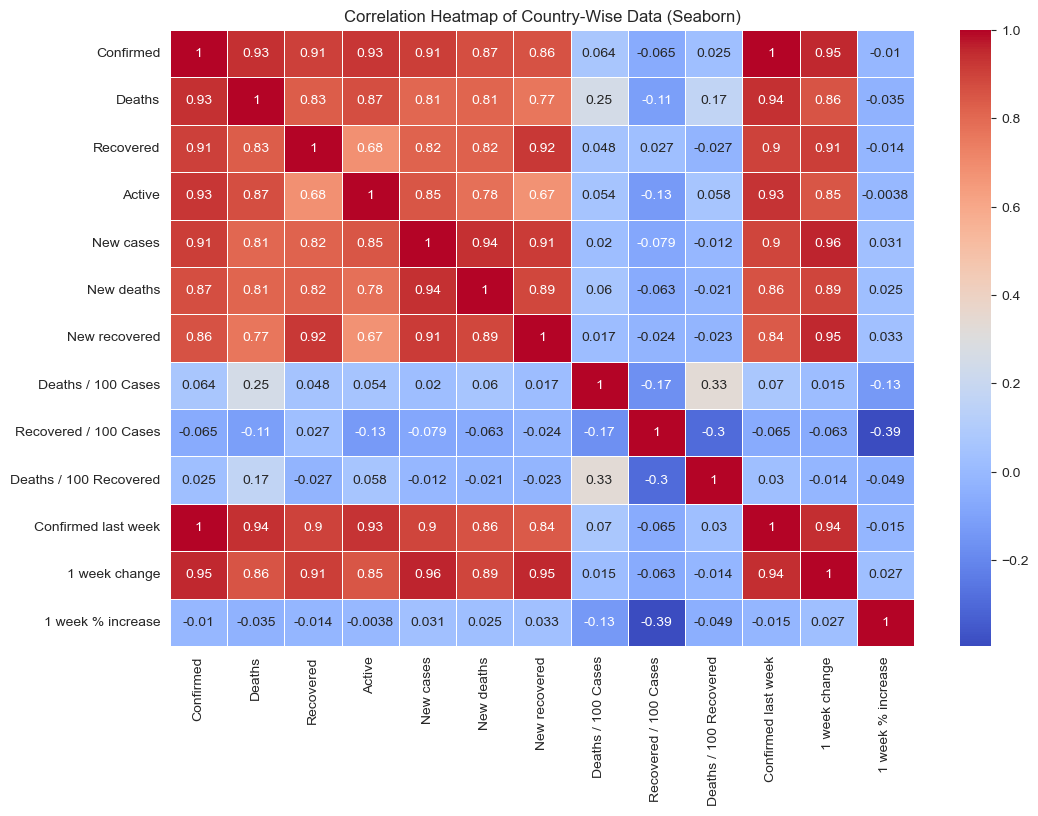

In [ ]:
# Select only numeric columns (columns with numbers) from the country dataset
# This removes text columns like country names, regions, etc.
numeric_df = df_country.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix between all numeric columns
# Correlation measures how much two columns are related to each other
# Returns values between -1 and +1:
#   +1 = Perfect positive relationship (both increase together)
#   -1 = Perfect negative relationship (one increases, other decreases)
#    0 = No relationship
corr = numeric_df.corr()

# Create a large plotting area for the heatmap
# figsize=(12,8) makes it 12 inches wide and 8 inches tall for better readability
plt.figure(figsize=(12,8))

# Create the correlation heatmap using Seaborn
sns.heatmap(corr,                    # The correlation matrix to visualize
            annot=True,              # Display correlation values inside each cell
            cmap='coolwarm',         # Color scheme: blue for negative, red for positive
            linewidths=0.5)          # Add thin white lines between cells for clarity

# Add a descriptive title to the heatmap
plt.title('Correlation Heatmap of Country-Wise Data (Seaborn)')

# Display the final heatmap visualization
plt.show()

# Horizontal bar chart with different colors for each country

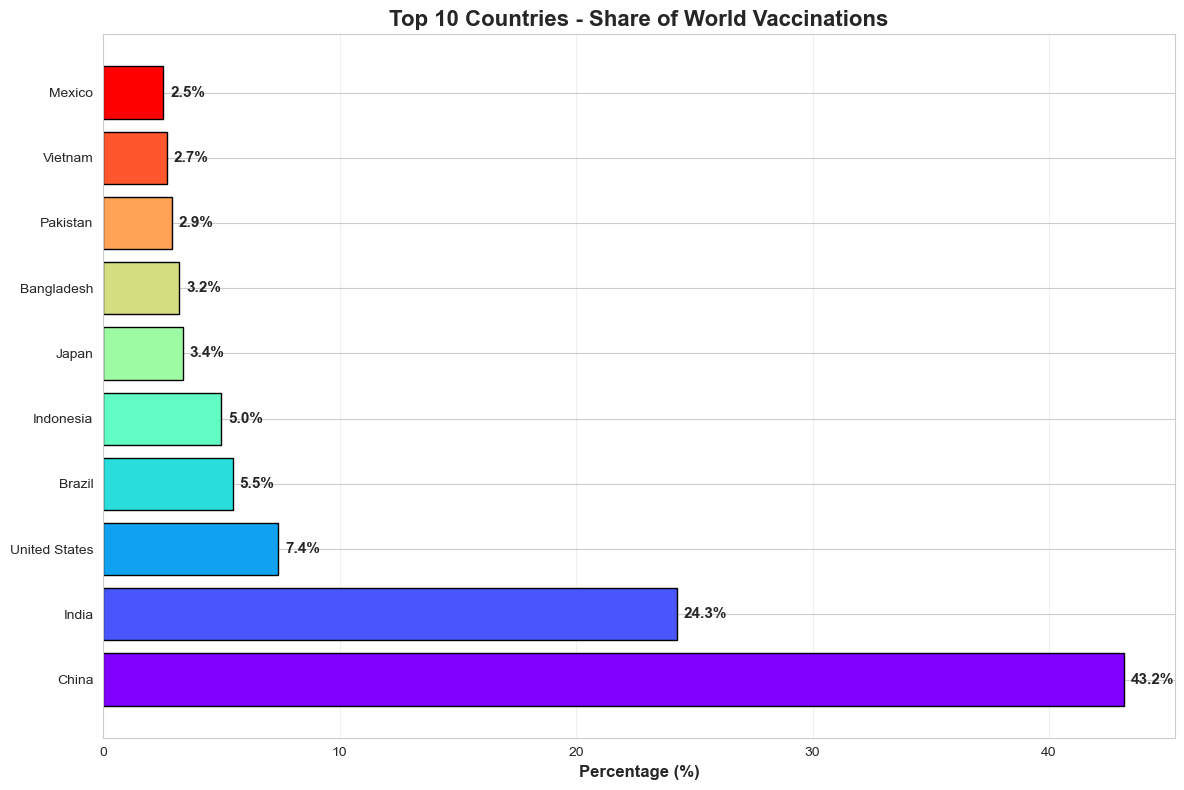

In [ ]:
# Get the top 10 countries by maximum total vaccinations
# Group by country, find each country's highest vaccination count, sort descending, take top 10
top_10 = df_vacc.groupby('country')['total_vaccinations'].max().nlargest(10)

# Calculate the total vaccinations across all top 10 countries
total_vacc = top_10.sum()

# Convert each country's vaccination count to percentage of total top 10 vaccinations
percentages = (top_10 / total_vacc) * 100

# Create a large horizontal bar chart area
# Horizontal bars are easier to read for country names
plt.figure(figsize=(12, 8))

# Generate different rainbow colors for each country bar
# np.linspace(0, 1, len(top_10)) creates equal spacing for color distribution
# plt.cm.rainbow converts these to actual rainbow colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_10)))

# Create horizontal bars with the rainbow colors and black borders
bars = plt.barh(percentages.index,           # Country names on y-axis
                percentages.values,          # Percentage values on x-axis  
                color=colors,                # Different color for each country
                edgecolor='black')           # Black borders around bars for clarity

# Add percentage labels to the right of each bar
for bar, percentage in zip(bars, percentages.values):
    plt.text(bar.get_width() + 0.3,          # Position: bar width + small offset to the right
             bar.get_y() + bar.get_height()/2,  # Position: middle of the bar vertically
             f'{percentage:.1f}%',           # Text: percentage with 1 decimal
             va='center',                    # Vertical alignment: center of bar
             fontweight='bold',              # Make text bold for better visibility
             fontsize=11)                    # Set text size

# Add a descriptive title with large bold font
plt.title('Top 10 Countries - Share of World Vaccinations', fontsize=16, fontweight='bold')

# Label the x-axis to show it represents percentages
plt.xlabel('Percentage (%)', fontsize=12, fontweight="bold")

# Add vertical grid lines for easier reading of percentage values
plt.grid(axis='x', alpha=0.3)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the final chart
plt.show()